In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
import os
%matplotlib inline


In [2]:

# Read the CSV file
df = pd.read_csv('/Users/kazimakbarov/Downloads/DisneylandReviews.csv', encoding='latin-1')
df_s = pd.read_csv('/Users/kazimakbarov/Downloads/DisneylandReviews.csv', encoding='latin-1')
print(df.info())
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB
None


(42656, 6)

In [3]:
df_s.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [4]:
#Count of NA
print(df.isnull().sum())

#Count of Duplicated Rows
df.duplicated().sum()

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64


12

In [5]:
df[df.duplicated()]
df.drop_duplicates(inplace = True, keep = 'first')

In [6]:
df['Review_Lenght'] = df['Review_Text'].apply(lambda x: len(x))
df = df[df['Year_Month'] != 'missing']
df_2 = df['Year_Month'].str.split('-', n =1, expand = True)
df['Year'] = df_2[0]
df['Month'] = df_2[1]

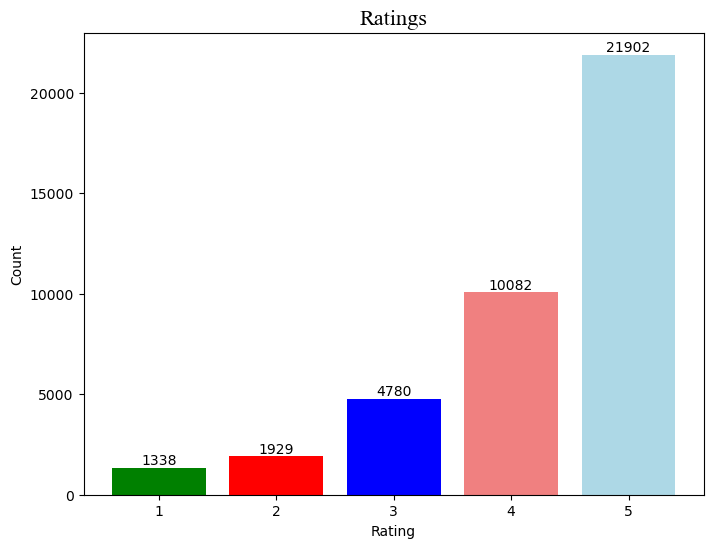

In [7]:
plt.figure(figsize=(8, 6))
rating_data = df["Rating"].value_counts()
colors = ['lightBlue','lightcoral', 'Blue' , 'Red','Green' ]

bars = plt.bar(rating_data.index, rating_data, color  = colors)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Ratings',fontsize=16, fontfamily = 'Times New Roman')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
    
plt.show()

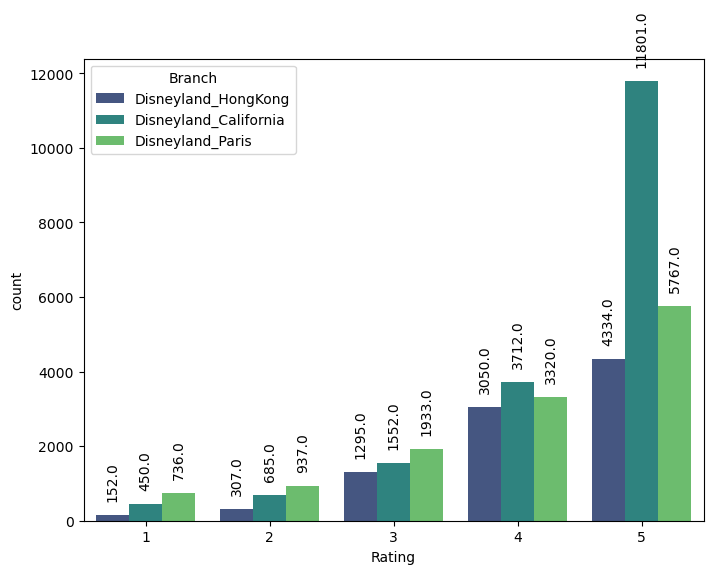

In [8]:

plt.figure(figsize=(8, 6))
ax = sns.countplot(x = 'Rating',data = df, hue = 'Branch', palette="viridis")

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', rotation = 90, xytext=(0, 10), textcoords='offset points')

plt.show()

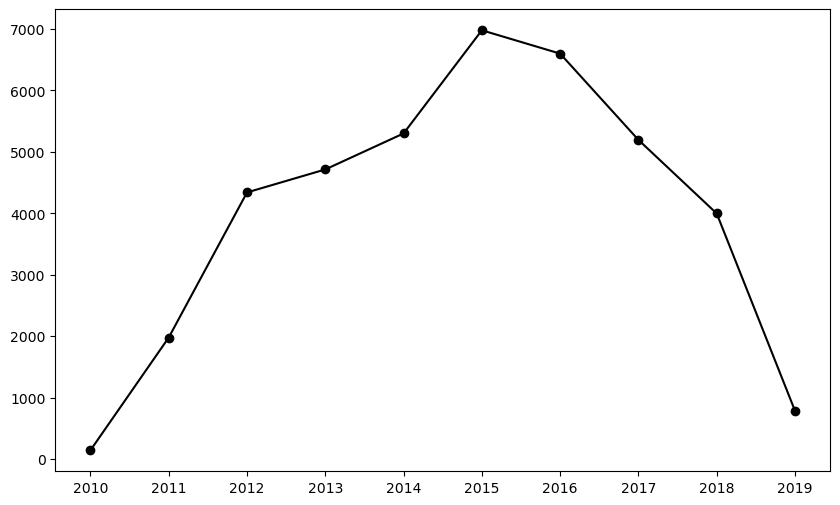

In [11]:
plt.figure(figsize = (10,6))
df_3 = df.groupby('Year', as_index = False).agg({'Review_Text':'count'})
plt.plot(df_3['Year'], df_3["Review_Text"], marker='o', linestyle='-', color='black', label='Line 1')
plt.show()

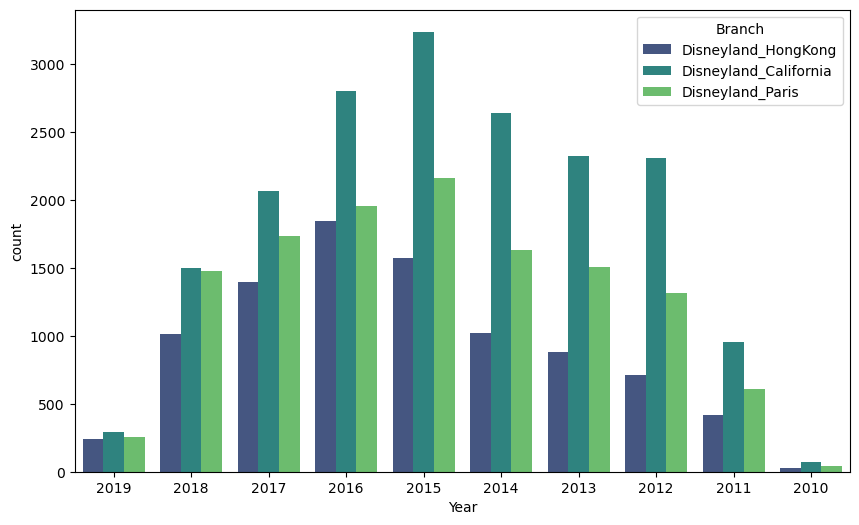

In [12]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'Year', hue = 'Branch', palette = 'viridis')
plt.show()

In [15]:
features = df['Review_Text'].values
processed_features = []

for sentence in range (0, len(features)):
    
    #Remove all the HTTP:
    processed_feature = re.sub("(https?://\S+)", "", str(features[sentence]))
    
    #Remove all the special charecters
    processed_feature = re.sub(r'[^a-zA-Z0-9_]', " ", processed_feature)
    processed_feature = re.sub(r'\W', " ", processed_feature)
    
    #Remove all single characters
    processed_feature = re.sub(r"\s+[a-zA-Z]\s+", " ", processed_feature)
    
    #Revome all single characters from the start
    processed_feature = re.sub(r"\^[a-zA-Z]\s+", " ", processed_feature)
    
    #Subsitting multiple spaces with single one
    processed_feature = re.sub(r"\s+", " ", processed_feature, flags = re.I)
    
    #Removing prefifixed 'b'
    processed_feature = re.sub(r"^b\s+", " ", processed_feature)
    
    #Converting to lowercase
    processed_feature = processed_feature.lower()

    
    processed_features.append(processed_feature)
    

In [16]:
df_test = pd.DataFrame()
df_test['reviews'] = processed_features

In [17]:
from textblob  import TextBlob
from wordcloud import WordCloud

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity


def getPolarity (text):
    return TextBlob(text).sentiment.polarity


def Analysis (score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return 'Positive'

    
df_test['Subjectivity'] = df_test['reviews'].apply(getSubjectivity)
df_test['Polarity'] = df_test['reviews'].apply(getPolarity)
df_test['Analysis'] = df_test['Polarity'].apply(Analysis)

df_test['reviews'].head()

0    if you ve ever been to disneyland anywhere you...
1    its been while since last time we visit hk dis...
2    thanks god it wasn too hot or too humid when w...
3    hk disneyland is great compact park unfortunat...
4    the location is not in the city took around 1 ...
Name: reviews, dtype: object

In [18]:
df['sentiment'] = df_test['Analysis']
df['Sentiment'] = df['Rating'].apply(lambda x: 'Negative' if x<3 else np.nan)
df['Sentiment'] = df['Sentiment'].fillna(df['sentiment'])

df.drop('sentiment', axis =1, inplace = True)

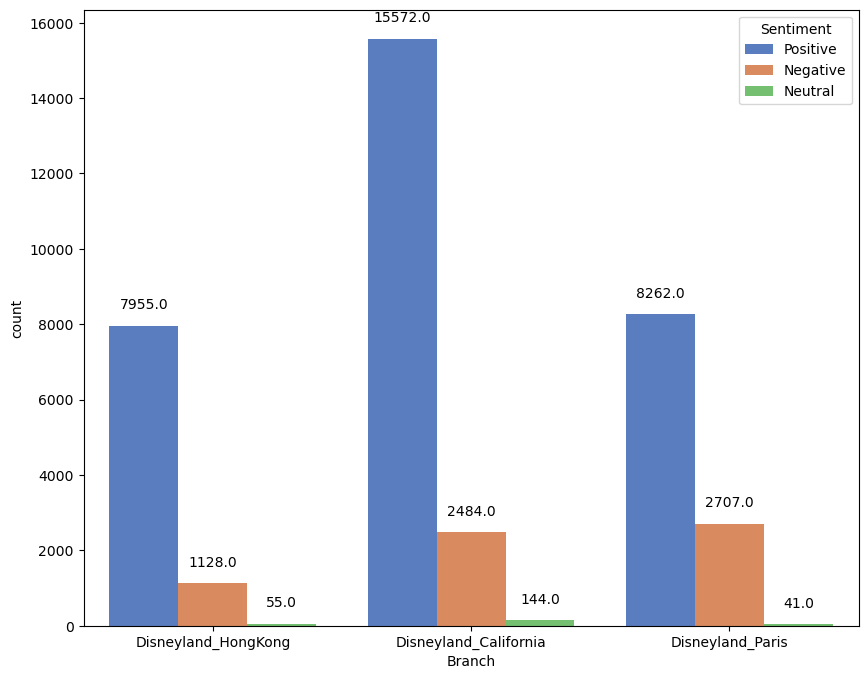

In [19]:
plt.figure(figsize = (10,8))
ax = sns.countplot(data = df, x = 'Branch', hue = 'Sentiment', palette = 'muted')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 10), textcoords='offset points')

plt.show()